In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import library, data

In [ ]:

import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.special import boxcox1p 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import scipy
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/drive/Shareddrives/R PYTHON/CK/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#EDA

##Manipulate and cleaning data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Check for null values in data
nullcount = df.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [ ]:
# missing percentage of the data
missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


In [ ]:
#duplicate values and drop it
df.duplicated().sum()


125

In [ ]:
df=df.drop_duplicates()

In [ ]:
# Checking for number of unique values for each feature
uniques = df.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [ ]:
# Describe the dataset
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205,12205
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329,NaN,NaN,NaN,NaN,10431,9346,10297
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,NaN,2.124211,2.357804,3.153298,4.073904,NaN,NaN,NaN
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,NaN,0.906823,1.710114,2.402340,4.016654,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


###Dealing with outliers

In [ ]:
df.shape

(12205, 18)

Text(0.5, 0.98, 'Boxplots showing outliers')

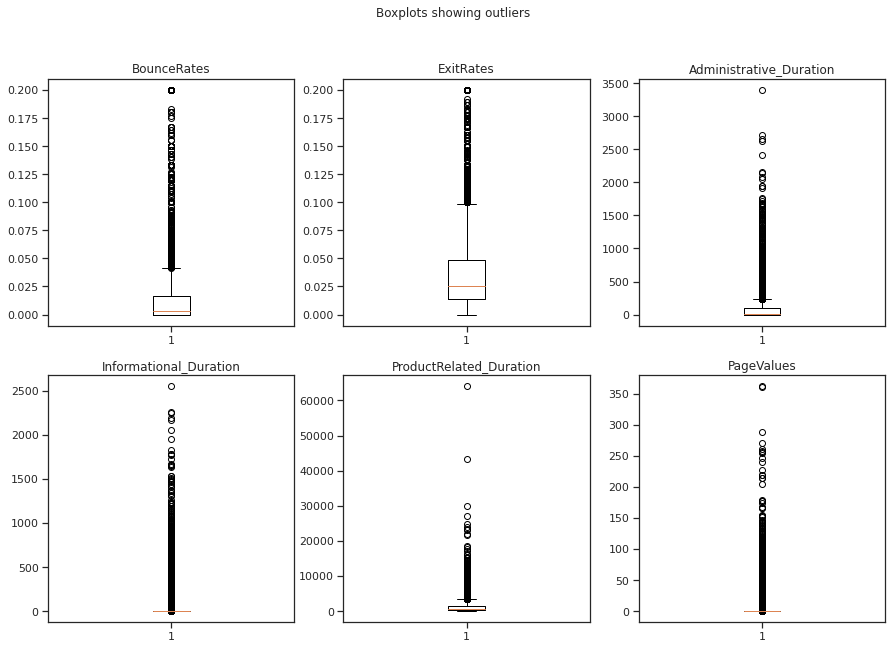

In [ ]:
#check boxplots showing outlier
plt.figure(figsize = (15, 10))

ax=plt.subplot(231)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')

ax=plt.subplot(232)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')

ax=plt.subplot(233)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')

ax=plt.subplot(234)
plt.boxplot(df['Informational_Duration'])
ax.set_title('Informational_Duration')

ax=plt.subplot(235)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

ax=plt.subplot(236)
plt.boxplot(df['PageValues'])
ax.set_title('PageValues')

plt.suptitle('Boxplots showing outliers')

In [ ]:
num_col = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
data = df[num_col]
z=np.abs(stats.zscore(data))
filtered_entries = (z < 3).all(axis=1)
df = df[filtered_entries]
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#Visualize and some insights


###Revenue analysis

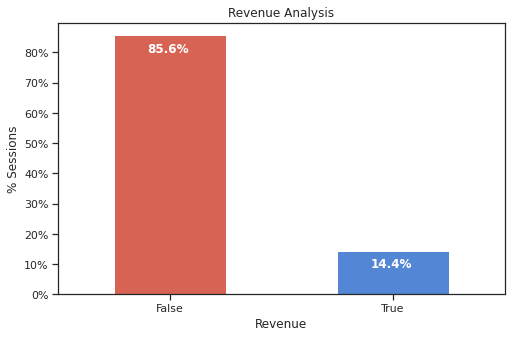

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize = (8,5))
colors = ['#d66354','#5486d6']

ax1 = (df['Revenue'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Revenue')
ax1.set_title('Revenue Analysis')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

###Tác động giữa BounceRate và ExitRate

Text(0.5, 1.0, 'Revenue by Bounce Rates')

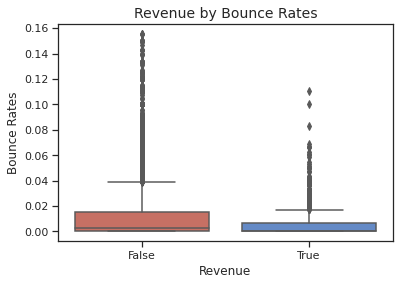

In [ ]:
ax1 = sns.boxplot(x="Revenue",y="BounceRates", data=df,palette=['#d66354','#5486d6'])
ax1.set_xlabel("Revenue", fontsize=12)
ax1.set_ylabel("Bounce Rates", fontsize=12)
ax1.set_title("Revenue by Bounce Rates", fontsize=14)

Text(0.5, 1.0, 'Revenue by Exit Rates')

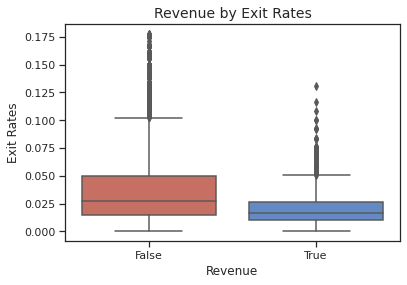

In [ ]:
ax1 = sns.boxplot(x="Revenue",y="ExitRates", data=df,palette=['#d66354','#5486d6'])
ax1.set_xlabel("Revenue", fontsize=12)
ax1.set_ylabel("Exit Rates", fontsize=12)
ax1.set_title("Revenue by Exit Rates", fontsize=14)

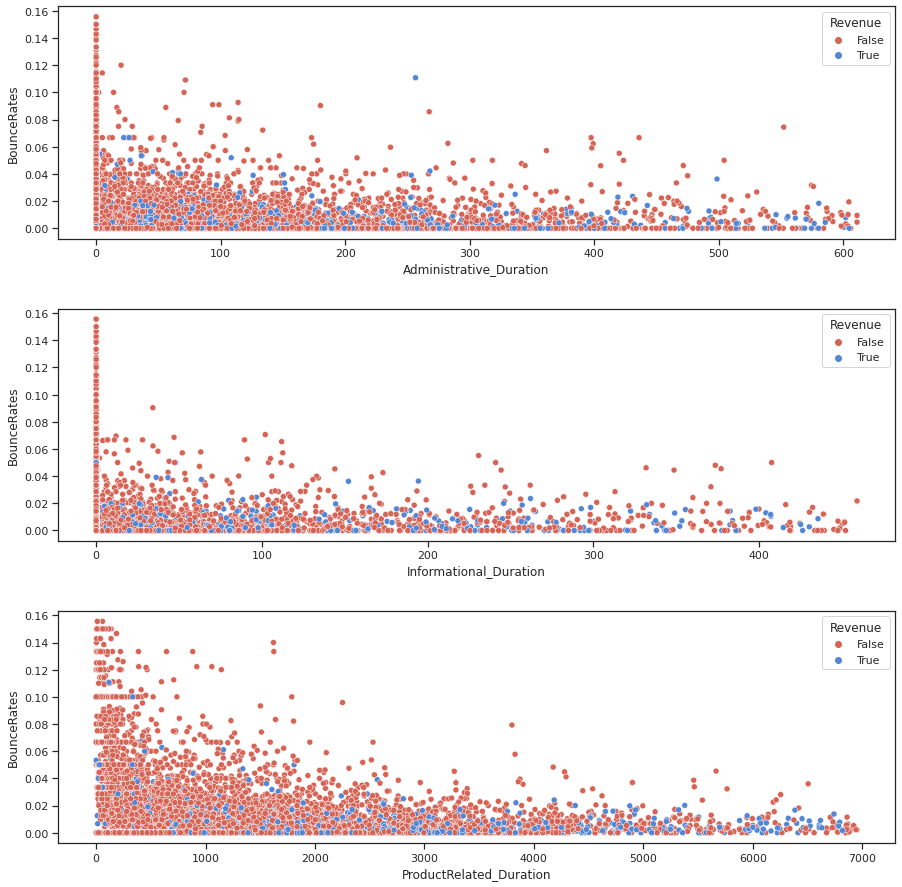

In [ ]:
fig, ax = plt.subplots(3,figsize=(15,15))

sns.set(style="ticks")

ax1 = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df, ax=ax[0])
ax2 = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'], data=df, ax=ax[1])
ax3 = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df, ax=ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

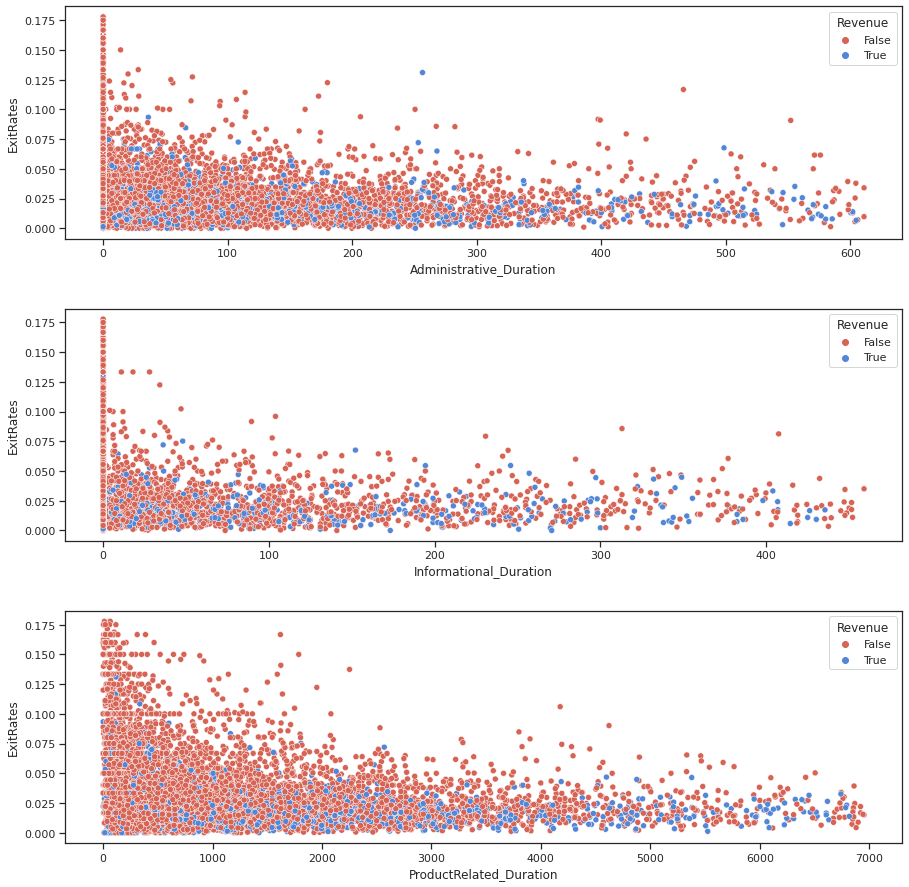

In [ ]:
fig, ax = plt.subplots(3,figsize=(15,15))

sns.set(style="ticks")

ax1 = sns.scatterplot(x="Administrative_Duration", y="ExitRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df, ax=ax[0])
ax2 = sns.scatterplot(x="Informational_Duration", y="ExitRates",hue="Revenue",palette = ['#d66354','#5486d6'], data=df, ax=ax[1])
ax3 = sns.scatterplot(x="ProductRelated_Duration", y="ExitRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df, ax=ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

Text(0.5, 1.0, 'ExitRates vs BounceRates')

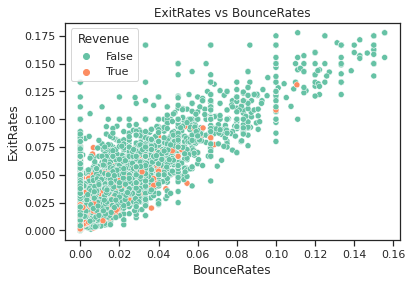

In [ ]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue',palette = "Set2", data=df)
ax.set_title('ExitRates vs BounceRates')

###Tác động khách hàng đối với việc mua hàng vào cuối tuần

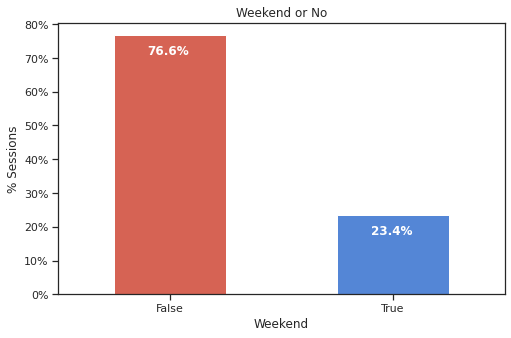

In [ ]:
plt.figure(figsize = (8,5))
colors = ['#d66354','#5486d6']

ax1 = (df['Weekend'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Weekend')
ax1.set_title('Weekend or No')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

Text(0.5, 1.0, 'Weekend by Revenue')

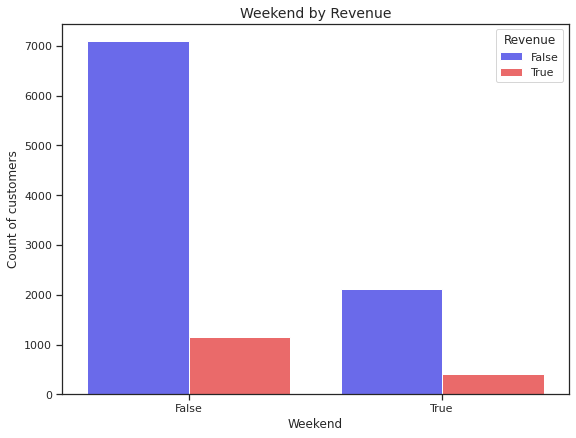

In [ ]:
plt.figure(figsize = (20,15))

ax = plt.subplot(221)
ax = sns.countplot(x="Weekend", data=df, 
              palette="seismic", hue="Revenue")
ax.set_xlabel("Weekend", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Weekend by Revenue", fontsize=14)

###Tác động của loại khách hàng lên doanh thu

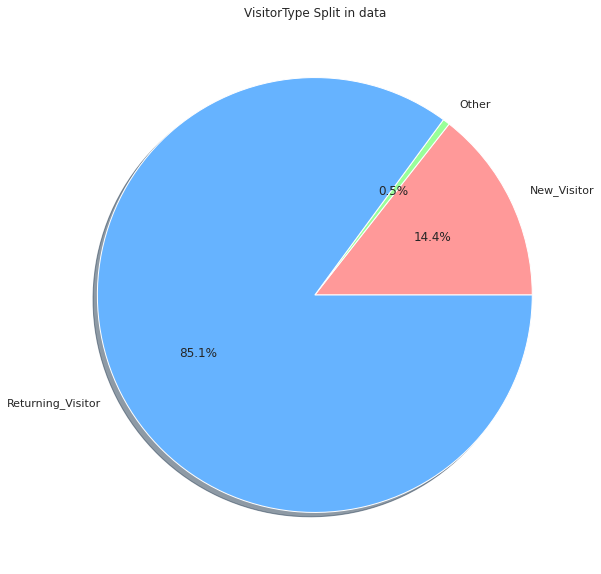

In [ ]:
data_VisitorType = df.groupby('VisitorType')['VisitorType'].count()
data_VisitorType = pd.DataFrame({'VisitorType':data_VisitorType.index, 'Count':data_VisitorType.values})
plt.figure(figsize = (10,10))
colors = ['#ff9999','#99ff99','#66b3ff']
plt.pie(data_VisitorType['Count'],colors = colors, labels = data_VisitorType['VisitorType'],autopct='%1.1f%%',shadow=True);
plt.title('VisitorType Split in data');

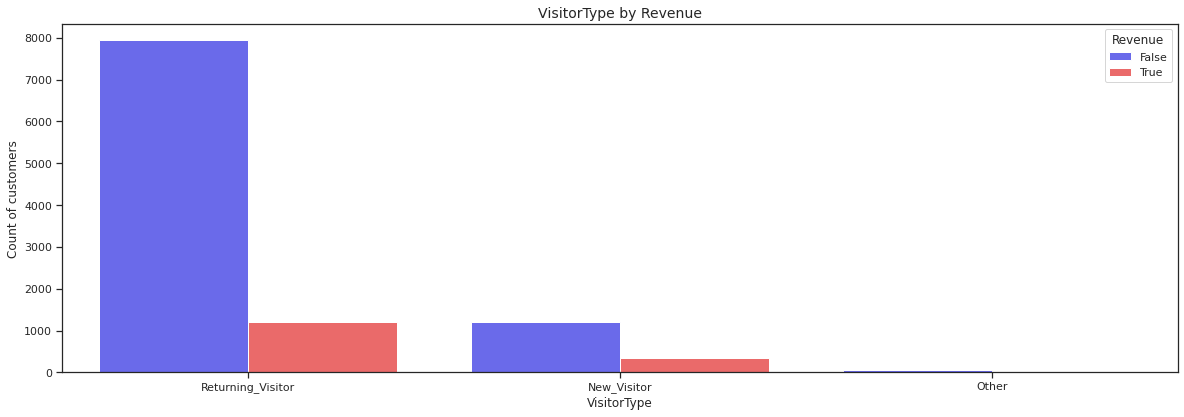

In [ ]:

plt.figure(figsize = (20,15))
ax2 = plt.subplot(212)
ax2 = sns.countplot(x="VisitorType", data=df, 
              palette="seismic", hue="Revenue")
ax2.set_xlabel("VisitorType", fontsize=12)
ax2.set_ylabel("Count of customers", fontsize=12)
ax2.set_title("VisitorType by Revenue", fontsize=14)

plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

###Tác động của ngày lễ lên tỷ lệ chuyển đổi từ khách hàng mới sang khách hàng cũ

Text(0, 0.5, 'Visitors')

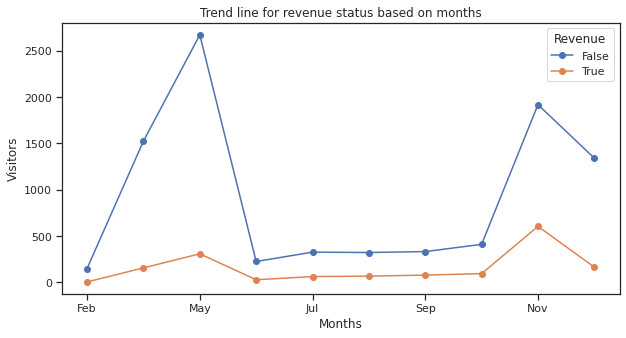

In [ ]:
#Trend line for revenue status based on months 
df1 = df.groupby(['Month','Revenue'])['Revenue'].count().unstack('Revenue').fillna(0)
# arrange df1 by month
df1 = df1.reindex(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
# show all months in trend line chart
df1.plot(kind='line',figsize=(10,5),title='Trend line for revenue status based on months', marker='o') 
plt.xlabel('Months')
plt.ylabel('Visitors')


Text(0, 0.5, 'Visitors')

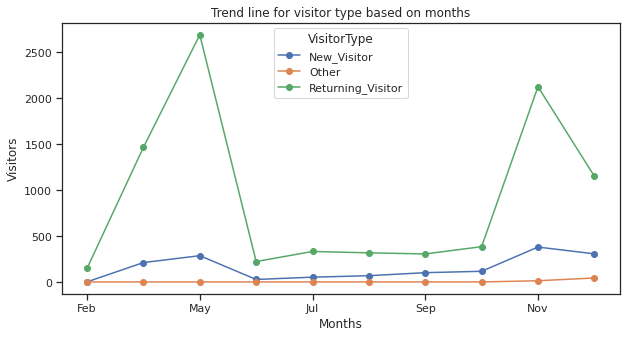

In [ ]:
# trend line for visitor type based on months 
df2 = df.groupby(['Month','VisitorType'])['VisitorType'].count().unstack('VisitorType').fillna(0)
# arrange df2 by month
df2 = df2.reindex(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
# show all months in trend line chart
df2.plot(kind='line',figsize=(10,5),title='Trend line for visitor type based on months', marker='o')
plt.xlabel('Months')
plt.ylabel('Visitors')

###Tác động của yếu tố khác lên doanh thu

In [ ]:
df3 = df.groupby(['OperatingSystems','Revenue'])['Revenue'].count().unstack('Revenue').fillna(0)
df3

Revenue,False,True
OperatingSystems,,
1,1916.0,310.0
2,4873.0,919.0
3,1985.0,234.0
4,360.0,72.0
5,5.0,1.0
6,12.0,2.0
7,5.0,0.0
8,46.0,7.0


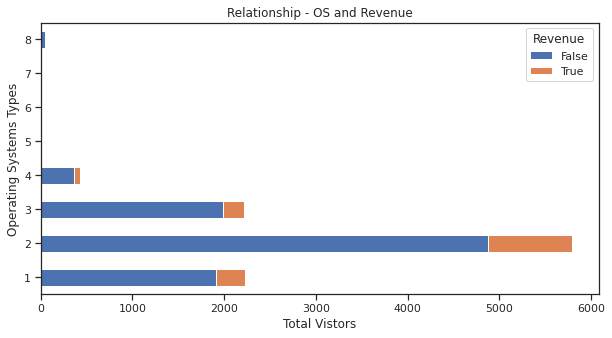

In [ ]:
#Relationship between Operating Systems and Revenue
df3.plot(kind='barh',figsize=(10,5),title='Relationship - OS and Revenue', stacked=True)
plt.xlabel('Total Vistors')
plt.ylabel('Operating Systems Types') 
plt.show()

In [ ]:
df4 = df.groupby(['Browser','Revenue'])['Revenue'].count().unstack('Revenue').fillna(0)
df4

Revenue,False,True
Browser,,
1,1833.0,301.0
2,5955.0,986.0
3,87.0,4.0
4,540.0,113.0
5,347.0,68.0
6,139.0,14.0
7,39.0,5.0
8,99.0,17.0
9,1.0,0.0


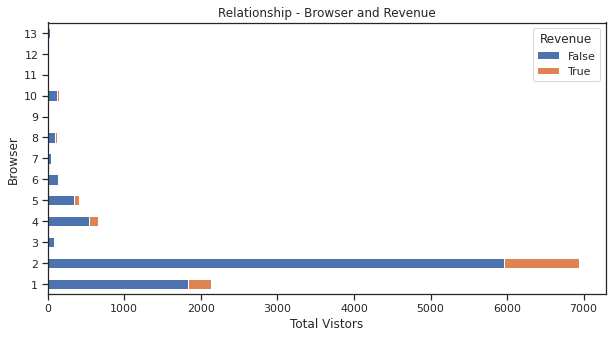

In [ ]:
#Relationship between Browser and Revenue 
df4.plot(kind='barh',figsize=(10,5),title='Relationship - Browser and Revenue', stacked=True)
plt.xlabel('Total Vistors')
plt.ylabel('Browser')
plt.show()

In [ ]:
df5 = df.groupby(['Region','Revenue'])['Revenue'].count().unstack('Revenue').fillna(0)
df5

Revenue,False,True
Region,,
1,3540,609
2,832,156
3,1815,296
4,887,143
5,231,40
6,615,97
7,572,94
8,343,50
9,367,60


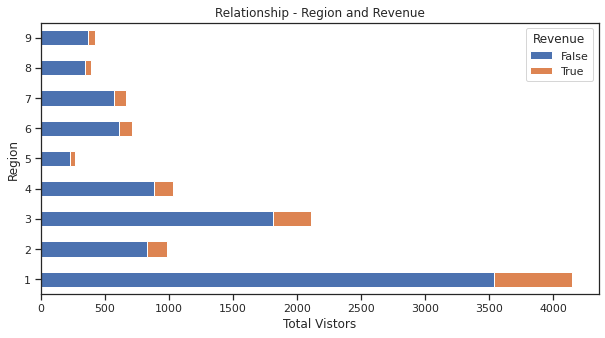

In [ ]:
#Relationship between Region and Revenue 
df5.plot(kind='barh',figsize=(10,5),title='Relationship - Region and Revenue', stacked=True)
plt.xlabel('Total Vistors')
plt.ylabel('Region')
plt.show()

In [ ]:
df6 = df.groupby(['TrafficType','Revenue'])['Revenue'].count().unstack('Revenue').fillna(0)
df6

Revenue,False,True
TrafficType,,
1,1854.0,229.0
2,2784.0,654.0
3,1629.0,152.0
4,834.0,140.0
5,187.0,53.0
6,353.0,45.0
7,27.0,11.0
8,227.0,75.0
9,32.0,3.0


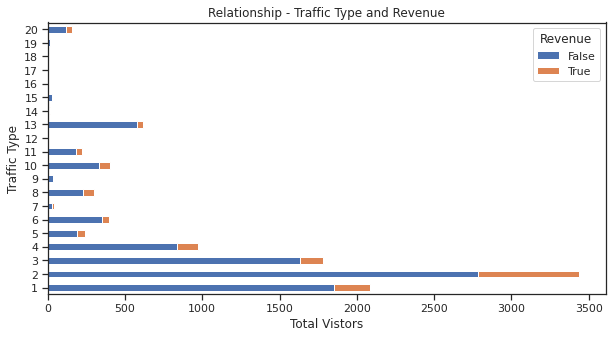

In [ ]:
#Relationship between traffic type and Revenue
df6.plot(kind='barh',figsize=(10,5),title='Relationship - Traffic Type and Revenue', stacked=True)
plt.xlabel('Total Vistors')
plt.ylabel('Traffic Type')
plt.show()

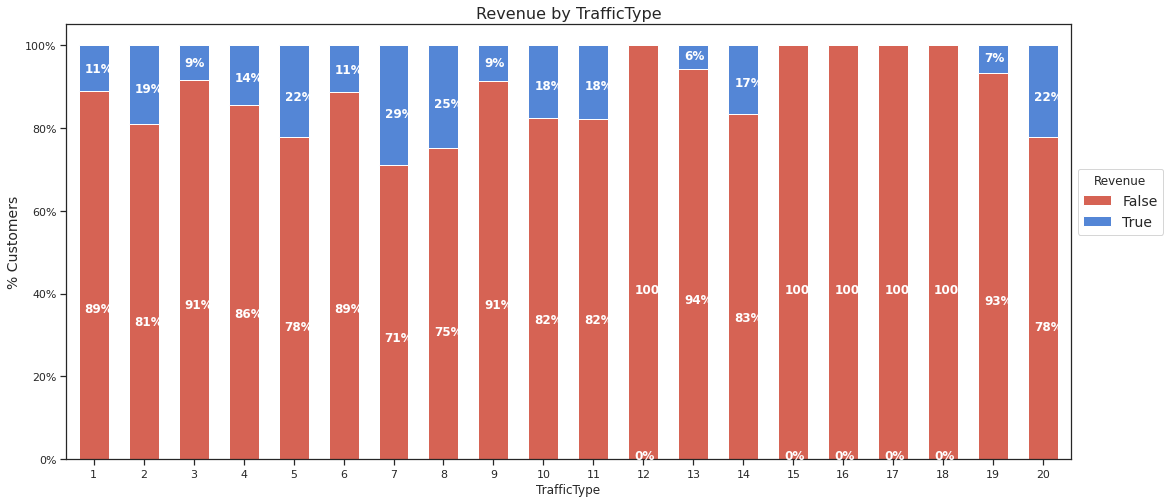

In [ ]:
import matplotlib.ticker as mtick
traffic_revenue = df.groupby(['TrafficType','Revenue']).size().unstack()

ax = (traffic_revenue.T*100.0 / traffic_revenue.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0,color = ['#d66354','#5486d6'] ,
                                                                figsize = (18,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 0.5),loc='lower left',prop={'size':14},title = 'Revenue')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Revenue by TrafficType',size = 16)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.20*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)

#**DUMMY DF, Modeling and EVALUATE**

In [ ]:
df1=pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
le= LabelEncoder()
df1['Revenue']=le.fit_transform(df1['Revenue'])
df1['Weekend']=le.fit_transform(df1['Weekend'])
df1.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x1=df1.drop('Revenue', axis=1)
y1=df1['Revenue']

In [ ]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.20)
print(x1.shape)
print(y1.shape)

(10747, 28)
(10747,)


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x1_train,y1_train)

GaussianNB()

In [ ]:
nb.score(x1_train, y1_train), nb.score(x1_test, y1_test)

(0.7921367919041526, 0.7879069767441861)

In [ ]:
#knn
knn = KNeighborsClassifier()
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [ ]:
knn.score(x1_train, y1_train),knn.score(x1_test, y1_test)

(0.8935675235547283, 0.867906976744186)

In [ ]:
# Decision Tree
dt= DecisionTreeClassifier()
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x1_train, y1_train),dt.score(x1_test, y1_test)

(1.0, 0.8488372093023255)

In [ ]:
#RandomForest
rdf= RandomForestClassifier()
rdf.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
rdf.score(x1_train, y1_train),rdf.score(x1_test, y1_test)

(1.0, 0.9074418604651163)

#**CONFUSION MATRIX**

# Naive Bayes

In [ ]:
#Function to plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Predicted labels for X train
y_pred_train= nb.predict(x1_train)
# Predicted labels for X test
y_pred_test= nb.predict(x1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test,y_pred_test)
print(cm)

[[1478  360]
 [  96  216]]


Confusion matrix, without normalization


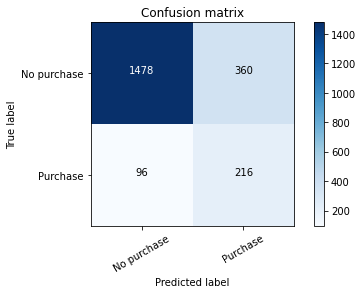

In [ ]:
classes = ['No purchase', 'Purchase']
plot_confusion_matrix(cm, classes)

In [ ]:
print("Accuracy score  :", accuracy_score(y1_test, y_pred_test))
print("Precision score :", precision_score(y1_test, y_pred_test))
print("Recall score    :", recall_score(y1_test, y_pred_test))
print("F1 score        :", f1_score(y1_test, y_pred_test))

Accuracy score  : 0.7879069767441861
Precision score : 0.375
Recall score    : 0.6923076923076923
F1 score        : 0.48648648648648646


#DecisionTree

In [ ]:
# Predicted labels for X train
y_pred_train= dt.predict(x1_train)
# Predicted labels for X test
y_pred_test= dt.predict(x1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test,y_pred_test)
print(cm)

[[1666  172]
 [ 153  159]]


Confusion matrix, without normalization


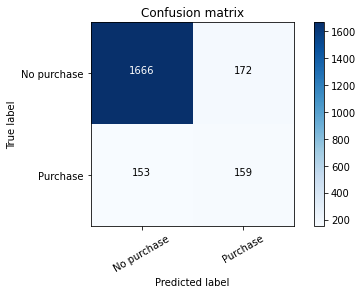

In [ ]:
classes = ['No purchase', 'Purchase']
plot_confusion_matrix(cm, classes)

In [ ]:
print("Accuracy score  :", accuracy_score(y1_test, y_pred_test))
print("Precision score :", precision_score(y1_test, y_pred_test))
print("Recall score    :", recall_score(y1_test, y_pred_test))
print("F1 score        :", f1_score(y1_test, y_pred_test))

Accuracy score  : 0.8488372093023255
Precision score : 0.48036253776435045
Recall score    : 0.5096153846153846
F1 score        : 0.494556765163297


#KNN


In [ ]:
# Predicted labels for X train
y_pred_train= knn.predict(x1_train)
# Predicted labels for X test
y_pred_test= knn.predict(x1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test,y_pred_test)
print(cm)

[[1787   51]
 [ 233   79]]


Confusion matrix, without normalization


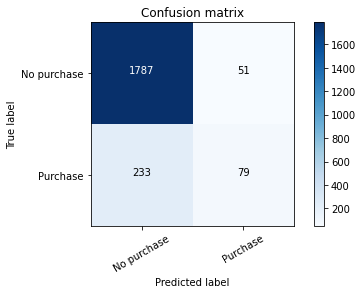

In [ ]:
classes = ['No purchase', 'Purchase']
plot_confusion_matrix(cm, classes)

In [ ]:
print("Accuracy score  :", accuracy_score(y1_test, y_pred_test))
print("Precision score :", precision_score(y1_test, y_pred_test))
print("Recall score    :", recall_score(y1_test, y_pred_test))
print("F1 score        :", f1_score(y1_test, y_pred_test))

Accuracy score  : 0.867906976744186
Precision score : 0.6076923076923076
Recall score    : 0.2532051282051282
F1 score        : 0.3574660633484163


#random forest

In [ ]:
# Predicted labels for X train
y_pred_train= rdf.predict(x1_train)
# Predicted labels for X test
y_pred_test= rdf.predict(x1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test,y_pred_test)
print(cm)

[[1788   50]
 [ 149  163]]


Confusion matrix, without normalization


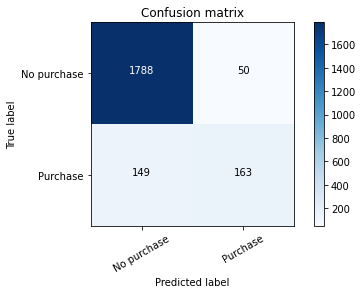

In [ ]:
classes = ['No purchase', 'Purchase']
plot_confusion_matrix(cm, classes)

In [ ]:
print("Accuracy score  :", accuracy_score(y1_test, y_pred_test))
print("Precision score :", precision_score(y1_test, y_pred_test))
print("Recall score    :", recall_score(y1_test, y_pred_test))
print("F1 score        :", f1_score(y1_test, y_pred_test))

Accuracy score  : 0.9074418604651163
Precision score : 0.7652582159624414
Recall score    : 0.5224358974358975
F1 score        : 0.620952380952381


# **ĐÁNH GIÁ**

#AUC


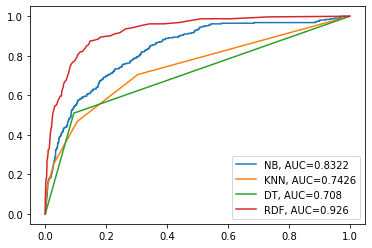

In [ ]:
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

# model and plot ROC curve
#nb
y_pred = nb.predict_proba(x1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred)
auc = round(metrics.roc_auc_score(y1_test, y_pred), 4)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))

#knn
y_pred = knn.predict_proba(x1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred)
auc = round(metrics.roc_auc_score(y1_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#dt
y_pred = dt.predict_proba(x1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred)
auc = round(metrics.roc_auc_score(y1_test, y_pred), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))

#rdf
y_pred = rdf.predict_proba(x1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred)
auc = round(metrics.roc_auc_score(y1_test, y_pred), 4)
plt.plot(fpr,tpr,label="RDF, AUC="+str(auc))

#add legend
plt.legend();

# Feature important

In [ ]:
importances = rdf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rdf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x1_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

col_names = pd.Series([col for col in x1_train.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted



Feature ranking:
1. Feature 8 (0.359822)
2. Feature 5 (0.085551)
3. Feature 7 (0.082050)
4. Feature 4 (0.076034)
5. Feature 1 (0.058350)
6. Feature 6 (0.053961)
7. Feature 0 (0.043758)
8. Feature 12 (0.033380)
9. Feature 13 (0.032195)
10. Feature 3 (0.025545)
11. Feature 22 (0.023551)
12. Feature 11 (0.020756)
13. Feature 10 (0.019076)
14. Feature 2 (0.017479)
15. Feature 14 (0.010824)
16. Feature 21 (0.007925)
17. Feature 25 (0.007828)
18. Feature 27 (0.007715)
19. Feature 16 (0.006097)
20. Feature 20 (0.005506)
21. Feature 18 (0.004740)
22. Feature 24 (0.004150)
23. Feature 23 (0.003880)
24. Feature 15 (0.003838)
25. Feature 9 (0.003402)
26. Feature 19 (0.001855)
27. Feature 26 (0.000543)
28. Feature 17 (0.000188)


,Importance
PageValues,0.359822
ProductRelated_Duration,0.085551
ExitRates,0.082050
ProductRelated,0.076034
Administrative_Duration,0.058350
BounceRates,0.053961
Administrative,0.043758
Region,0.033380
TrafficType,0.032195
Informational_Duration,0.025545


[Text(0.5, 0, 'Feature Importance')]

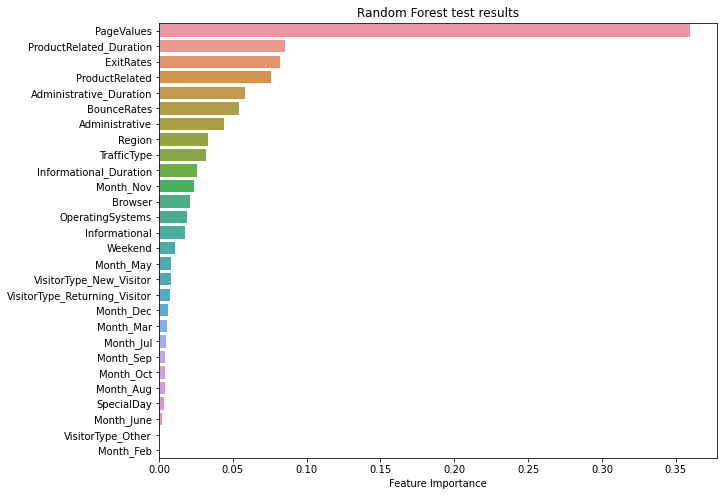

In [ ]:
feature_imp2 = pd.Series(rdf.feature_importances_,index=x1_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x=feature_imp2, y=feature_imp2.index)
ax.set_title('Random Forest test results')
ax.set(xlabel='Feature Importance')

#  Đặc điểm của 2 loại khách hàng là sẽ mua hàng (Revenue = True) và không mua hàng (Revenue = False)

In [ ]:
group_revenue = df.groupby(['Revenue']).mean().round(1)
group_revenue

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.0,58.4,0.4,15.9,26.9,960.9,0.0,0.0,1.5,0.1,2.1,2.3,3.2,4.0,0.2
True,3.1,92.8,0.7,30.5,40.3,1531.0,0.0,0.0,18.9,0.0,2.1,2.4,3.1,4.0,0.3
